In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("laptop_data.csv")
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [5]:
windows_10 = 'Windows 10'
data[data['OpSys']==windows_10]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.000
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.600
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.600
13,13,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,26581.392
16,16,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,39693.600
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.640
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.720
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.120
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.920


In [6]:
unique_type = data[data.Price > 0]['TypeName'].unique()
unique_type.sort()
unique_type

array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
       'Workstation'], dtype=object)

In [7]:
type_price_total = []
for i in unique_type:
    type_price_total.append(data[data.Price > 0][data['TypeName']==i][data['OpSys']==windows_10].Price.sum())

C:\Users\62812\AppData\Local\Temp\ipykernel_448\2461572505.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_price_total.append(data[data.Price > 0][data['TypeName']==i][data['OpSys']==windows_10].Price.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_448\2461572505.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_price_total.append(data[data.Price > 0][data['TypeName']==i][data['OpSys']==windows_10].Price.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_448\2461572505.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_price_total.append(data[data.Price > 0][data['TypeName']==i][data['OpSys']==windows_10].Price.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_448\2461572505.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_price_total.append(data[data.Price > 0][data['TypeName']==i][data['OpSys']==windows_10].Price.sum())
C:\U

In [8]:
print(set(zip(unique_type, type_price_total)))


{('Gaming', 18241528.4784), ('Netbook', 620120.5920000001), ('2 in 1 Convertible', 7879431.081599997), ('Workstation', 2443101.6528000003), ('Notebook', 25260078.902400002), ('Ultrabook', 12275380.5984)}


In [21]:
unique_company = data['Company'][data.Price > 1].unique()
unique_company

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [22]:
company_price_total = []
for i in unique_company:
    company_price_total.append(data[data.Price > 0][data['Company']==i][data['OpSys']==windows_10].Price.sum())

C:\Users\62812\AppData\Local\Temp\ipykernel_448\2571984354.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  company_price_total.append(data[data.Price > 0][data['Company']==i][data['OpSys']==windows_10].Price.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_448\2571984354.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  company_price_total.append(data[data.Price > 0][data['Company']==i][data['OpSys']==windows_10].Price.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_448\2571984354.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  company_price_total.append(data[data.Price > 0][data['Company']==i][data['OpSys']==windows_10].Price.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_448\2571984354.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  company_price_total.append(data[data.Price > 0][data['Company']==i][data['OpSys']==windows_10].Price.sum

In [23]:
print(set(zip(unique_company, company_price_total)))

{('Dell', 16994194.128), ('Asus', 8697475.152), ('Toshiba', 3100895.9999999995), ('Apple', 0.0), ('HP', 12954840.191999998), ('Vero', 46337.615999999995), ('Acer', 2810163.5568000004), ('Xiaomi', 49816.8), ('Huawei', 151741.44), ('MSI', 4974276.2112), ('Razer', 1247977.44), ('Samsung', 628331.0399999999), ('LG', 335504.16000000003), ('Lenovo', 14451303.8304), ('Google', 0.0), ('Mediacom', 110023.2), ('Microsoft', 0.0), ('Chuwi', 50237.1792), ('Fujitsu', 116523.36)}


In [33]:
nan_indices = []
for i in range(len(unique_company)):
    if type(unique_company[i])==int:
        nan_indices.append(i)

In [34]:
unique_company = list(unique_company)
company_price_total = list(company_price_total)

In [35]:
for i in nan_indices:
    unique_company.pop(i)
    company_price_total.pop(i)

unique_company    

['HP',
 'Asus',
 'Lenovo',
 'MSI',
 'Toshiba',
 'Xiaomi',
 'Razer',
 'Samsung',
 'Fujitsu']

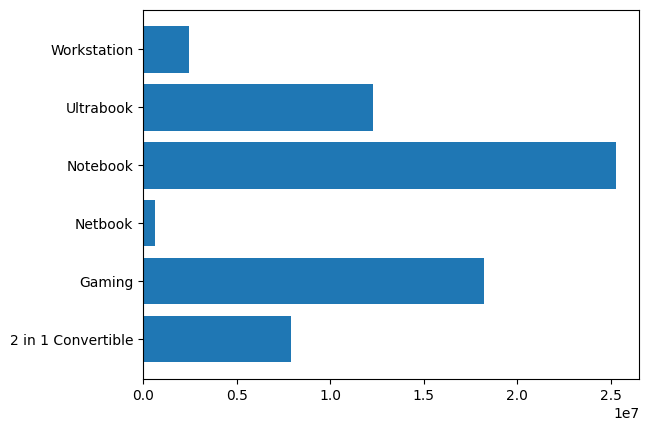

In [15]:
plt.barh(unique_type, type_price_total)
plt.show()

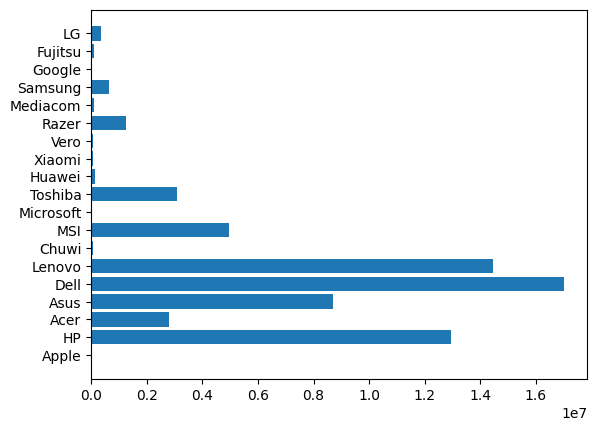

In [16]:
plt.barh(unique_company, company_price_total)
plt.show()

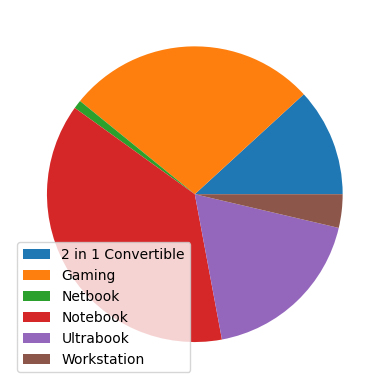

In [17]:
plt.pie(type_price_total)
plt.legend(unique_type, loc='best')
plt.show()

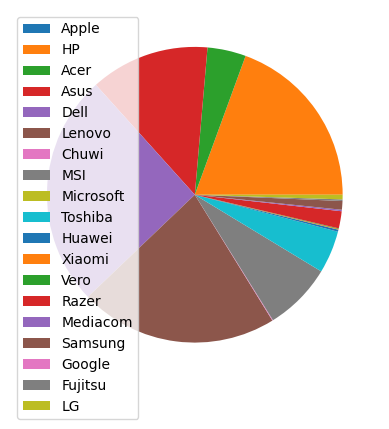

In [18]:
plt.pie(company_price_total)
plt.legend(unique_company, loc='best')
plt.show()